In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Converting csv file to dataframe
df_nypd = pd.read_csv(r"C:\Users\luguzman\Downloads\NYPD_Arrest_Data__Year_to_Date__20240506 (3).csv")

In [3]:
#Exploring 5 first rows of data
df_nypd.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)


In [4]:
#Reviewing datatype and number of rows/columns
df_nypd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63621 entries, 0 to 63620
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                63621 non-null  int64  
 1   ARREST_DATE               63621 non-null  object 
 2   PD_CD                     63619 non-null  float64
 3   PD_DESC                   63621 non-null  object 
 4   KY_CD                     63612 non-null  float64
 5   OFNS_DESC                 63621 non-null  object 
 6   LAW_CODE                  63621 non-null  object 
 7   LAW_CAT_CD                63219 non-null  object 
 8   ARREST_BORO               63621 non-null  object 
 9   ARREST_PRECINCT           63621 non-null  int64  
 10  JURISDICTION_CODE         63621 non-null  int64  
 11  AGE_GROUP                 63621 non-null  object 
 12  PERP_SEX                  63621 non-null  object 
 13  PERP_RACE                 63621 non-null  object 
 14  X_COOR

In [5]:
#Dropping 5 last columns 
df_nypd.drop(df_nypd.iloc[:, 14:18], axis=1, inplace=True)

df_nypd.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,New Georeferenced Column
63616,282877412,02/27/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,K,60,0,45-64,M,WHITE HISPANIC,POINT (-73.989545 40.5761)
63617,283628088,03/12/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,M,13,0,45-64,M,BLACK,POINT (-73.994805 40.740151)
63618,283387006,03/07/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160102A,F,K,73,0,25-44,M,BLACK,POINT (-73.913562 40.671104)
63619,283013910,03/01/2024,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110A4,M,K,83,0,25-44,F,BLACK,POINT (-73.91752179908735 40.698893568968515)
63620,283495531,03/10/2024,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100A,M,S,123,0,25-44,M,WHITE,POINT (-74.192126 40.531707)


In [6]:
#Changing data type to string and date
df_nypd['PD_DESC'] = df_nypd['PD_DESC'].astype('string')
df_nypd['OFNS_DESC'] = df_nypd['OFNS_DESC'].astype('string')
df_nypd['LAW_CAT_CD'] = df_nypd['LAW_CAT_CD'].astype('string')
df_nypd['ARREST_BORO'] = df_nypd['ARREST_BORO'].astype('string')
df_nypd['PERP_SEX'] = df_nypd['PERP_SEX'].astype('string')
df_nypd['PERP_RACE'] = df_nypd['PERP_RACE'].astype('string')
df_nypd['ARREST_DATE'] = pd.to_datetime(df_nypd['ARREST_DATE'])

In [7]:
#Removing null values
df_nypd.dropna()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,New Georeferenced Column
0,280255493,2024-01-10,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,POINT (-73.956312 40.814845)
1,279805419,2024-01-02,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,POINT (-73.9305713255961 40.6744956865259)
2,279895750,2024-01-03,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,POINT (-73.846499 40.662526)
3,280809090,2024-01-19,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,POINT (-73.843908 40.855793)
4,280357135,2024-01-11,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,POINT (-73.934343 40.694456)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63616,282877412,2024-02-27,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,K,60,0,45-64,M,WHITE HISPANIC,POINT (-73.989545 40.5761)
63617,283628088,2024-03-12,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,M,13,0,45-64,M,BLACK,POINT (-73.994805 40.740151)
63618,283387006,2024-03-07,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160102A,F,K,73,0,25-44,M,BLACK,POINT (-73.913562 40.671104)
63619,283013910,2024-03-01,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110A4,M,K,83,0,25-44,F,BLACK,POINT (-73.91752179908735 40.698893568968515)


In [8]:
#Number of arrests by borough 
borough_arrest = df_nypd.groupby(['ARREST_BORO'])['ARREST_KEY'].count()

In [9]:
dfboro = pd.DataFrame(data=borough_arrest, columns = ['ARREST_KEY'])
dfboro

,ARREST_KEY
ARREST_BORO,
B,14221
K,17402
M,15324
Q,13782
S,2892


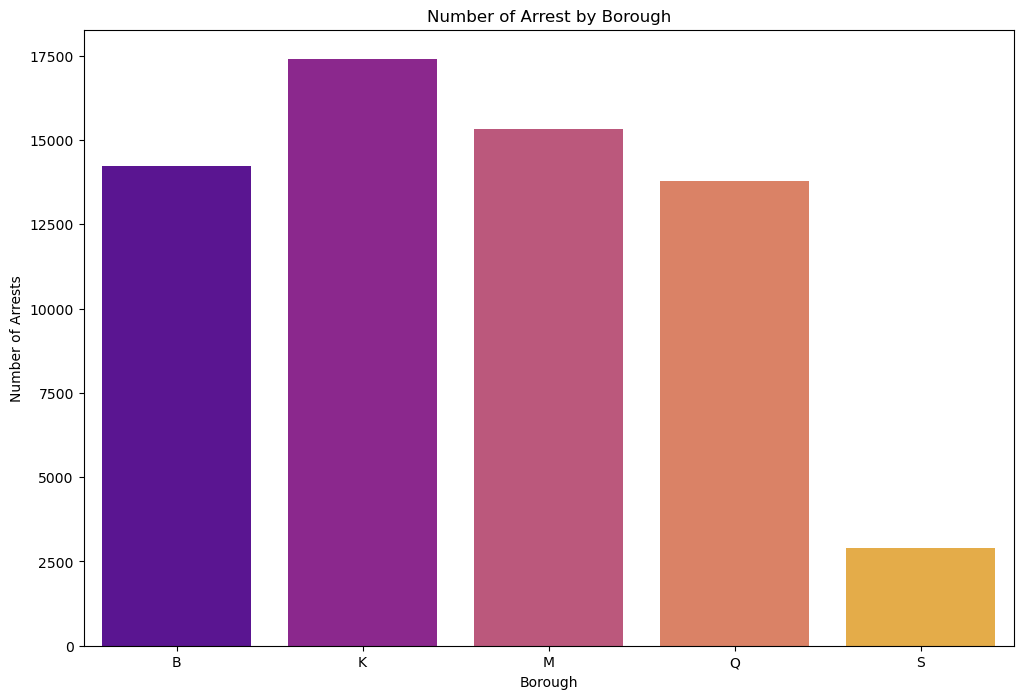

In [10]:
plt.figure(figsize=(12,8))

sns.barplot(x= dfboro.index, y='ARREST_KEY', data=dfboro, palette = 'plasma')
plt.title('Number of Arrest by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Arrests');

In [11]:
#Number of Arrest by boroughs and precinct
arrest_precinct = df_nypd.groupby(by=['ARREST_BORO','ARREST_PRECINCT'])['ARREST_KEY'].count()

In [12]:
df_precinct = pd.DataFrame(data = arrest_precinct, columns = ['ARREST_KEY'])
df_precinct= df_precinct.sort_values(by=['ARREST_BORO','ARREST_PRECINCT','ARREST_KEY'])
df_precinct

ARREST_KEY
ARREST_BORO ARREST_PRECINCT            
B           40                     1938
            41                     1046
            42                      939
            43                     1365
            44                     1933
...                                 ...
Q           115                    1219
S           120                    1389
            121                     788
            122                     409
            123                     306

[78 rows x 1 columns]

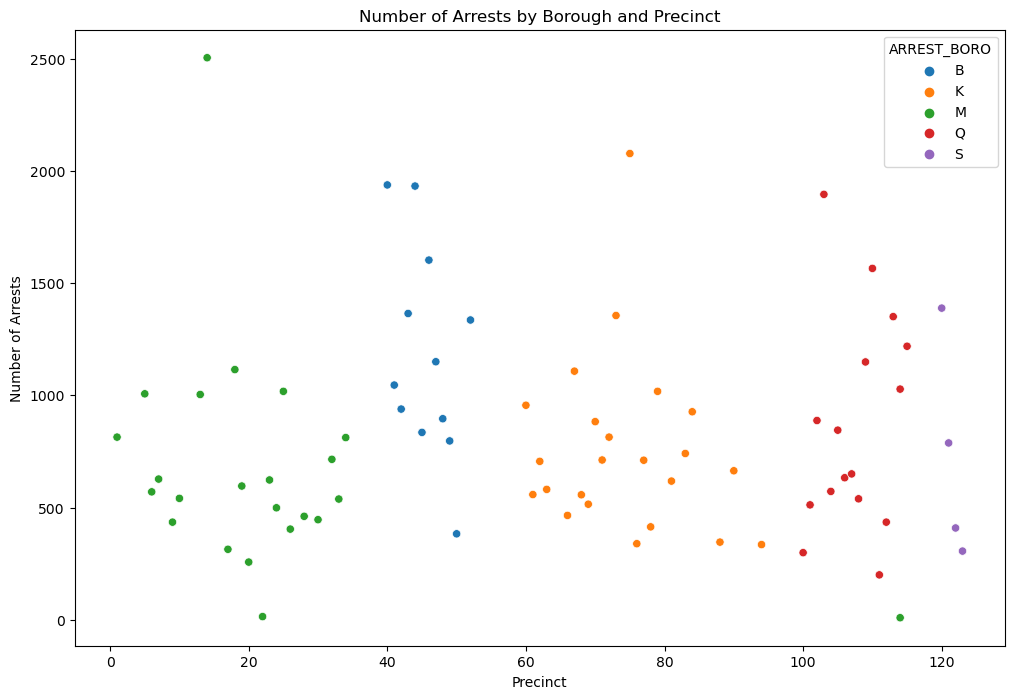

In [13]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='ARREST_PRECINCT', y='ARREST_KEY', data=df_precinct, hue = 'ARREST_BORO')
plt.title('Number of Arrests by Borough and Precinct')
plt.xlabel('Precinct')
plt.ylabel('Number of Arrests');

In [14]:
#Number of Arrest by boroughs and Perpetrator Sex 
arrest_perp = df_nypd.groupby(by=['ARREST_BORO','PERP_SEX'])['ARREST_KEY'].count()

In [15]:
df_perp= pd.DataFrame(data = arrest_perp, columns = ['ARREST_KEY'])
df_perp= df_perp.sort_values(by=['ARREST_BORO','PERP_SEX','ARREST_KEY'])
df_perp

ARREST_KEY
ARREST_BORO PERP_SEX            
B           F               2408
            M              11813
K           F               3026
            M              14376
M           F               2765
            M              12559
Q           F               2395
            M              11387
S           F                595
            M               2297

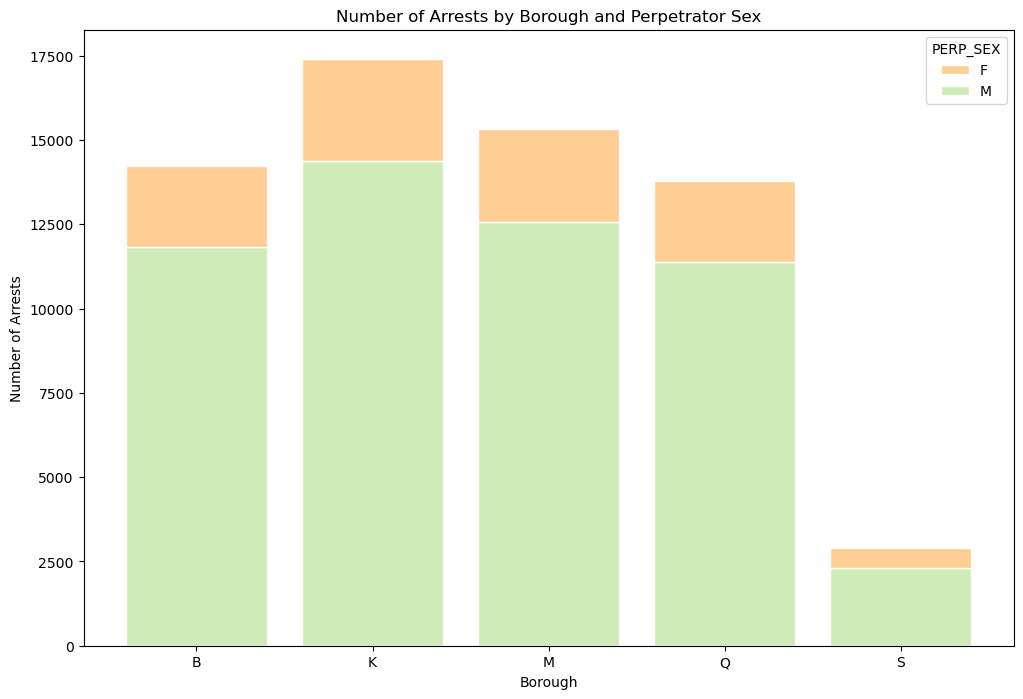

In [16]:
plt.figure(figsize=(12,8))

sns.histplot(df_perp,x='ARREST_BORO',
             weights= 'ARREST_KEY',
             hue= 'PERP_SEX', 
             multiple='stack', 
             palette = 'Spectral', 
             edgecolor = 'white', 
             shrink=0.8)
             
plt.title('Number of Arrests by Borough and Perpetrator Sex')
plt.xlabel('Borough')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=0);

In [17]:
#Number of specific offenses by Perpetrator Race 

Offense = ['TAX LAW', 'DISORDERLY CONDUCT','CRIMINAL POSSESSION WEAPON']

df_offense = df_nypd[df_nypd['PD_DESC'].isin(Offense)]
df_offense

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,New Georeferenced Column
65,280298774,2024-01-10,625.0,DISORDERLY CONDUCT,572.0,DISORDERLY CONDUCT,PL 2402007,V,K,83,1,18-24,M,BLACK,POINT (-73.9056404608319 40.682382877170305)
140,281217435,2024-01-27,792.0,CRIMINAL POSSESSION WEAPON,118.0,DANGEROUS WEAPONS,PL 265031B,F,B,47,0,18-24,M,BLACK,POINT (-73.847247 40.887325)
192,281250095,2024-01-28,792.0,CRIMINAL POSSESSION WEAPON,118.0,DANGEROUS WEAPONS,PL 265031B,F,K,73,0,25-44,M,ASIAN / PACIFIC ISLANDER,POINT (-73.910672 40.6735)
293,280154721,2024-01-08,625.0,DISORDERLY CONDUCT,572.0,DISORDERLY CONDUCT,PL 2402005,V,M,5,0,25-44,F,WHITE,POINT (-73.99563157321111 40.71546572952549)
416,281261392,2024-01-28,792.0,CRIMINAL POSSESSION WEAPON,118.0,DANGEROUS WEAPONS,PL 265031B,F,K,81,2,25-44,M,BLACK,POINT (-73.938364 40.692119)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63347,283760092,2024-03-14,792.0,CRIMINAL POSSESSION WEAPON,118.0,DANGEROUS WEAPONS,PL 265031B,F,K,67,0,25-44,M,BLACK,POINT (-73.95082 40.648859)
63367,283732804,2024-03-14,625.0,DISORDERLY CONDUCT,572.0,DISORDERLY CONDUCT,PL 2402005,V,M,14,0,25-44,F,ASIAN / PACIFIC ISLANDER,POINT (-73.990501 40.756259)
63480,283493758,2024-03-10,792.0,CRIMINAL POSSESSION WEAPON,118.0,DANGEROUS WEAPONS,PL 2651B01,F,M,23,0,18-24,M,WHITE HISPANIC,POINT (-73.945 40.787126)
63509,283747529,2024-03-13,792.0,CRIMINAL POSSESSION WEAPON,118.0,DANGEROUS WEAPONS,PL 265031B,F,B,44,0,25-44,M,WHITE HISPANIC,POINT (-73.915945 40.82737)


In [18]:
df_offense = df_offense.groupby(['PD_DESC','PERP_RACE'])['ARREST_KEY'].count()

In [30]:
df_race = pd.DataFrame(data= df_offense, columns = ['ARREST_KEY'])
df_race = df_race.sort_values(by=['PD_DESC','PERP_RACE','ARREST_KEY'])
df_race

ARREST_KEY
PD_DESC                    PERP_RACE                                 
CRIMINAL POSSESSION WEAPON AMERICAN INDIAN/ALASKAN NATIVE           2
                           ASIAN / PACIFIC ISLANDER                33
                           BLACK                                  744
                           BLACK HISPANIC                          88
                           UNKNOWN                                  3
                           WHITE                                   40
                           WHITE HISPANIC                         160
DISORDERLY CONDUCT         AMERICAN INDIAN/ALASKAN NATIVE           5
                           ASIAN / PACIFIC ISLANDER                35
                           BLACK                                   19
                           BLACK HISPANIC                           5
                           UNKNOWN                                 17
                           WHITE                                  217
                           WHITE HISPANIC                          17
TAX LAW                    AMERICAN INDIAN/ALASKAN NATIVE           3
                           ASIAN / PACIFIC ISLANDER                28
                           BLACK                                    5
                           BLACK HISPANIC                           4
                           UNKNOWN                                  1
                           WHITE                                    5
                           WHITE HISPANIC                           6

# Conclusion 
a. Brooklyn has the larger number of arrests. 
b. Manhattan has the precinct with the highest number of arrests (over 2,500)
c. Male number of arrests are much higher than female
d. Black has the more number of arrests due to Criminal Possession Weapon, White has the more number of arrests due to Disorderly Conduct, and Asian/Pacific Islander has the more number of arrests due to Tax law. 